# 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

### 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df["target"] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## 데이터 분류

In [2]:
df_x = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target,columns=["target"])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x.values,df_y.values, test_size=0.2, random_state=42)


## 모델 설계

In [4]:
def Linear_model(X,W,b):
    return np.matmul(X,W)+b

In [5]:
def MSE(a, b):
    return ((a - b) ** 2).mean()


def loss(X, W, b, y,model):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


In [6]:
def gradient(X, W, b, y,model):
    N = len(X)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db


## 학습

In [7]:
W= np.expand_dims(np.random.rand(len(X_train[0])),-1)
b=np.random.rand()
LEARNING_RATE= 0.25 # 0.5:2889.12 0.25:2872

losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train,Linear_model)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train,Linear_model)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 100 : Loss 4676.3463
Iteration 200 : Loss 4006.1147
Iteration 300 : Loss 3651.2769
Iteration 400 : Loss 3442.9195
Iteration 500 : Loss 3308.2570
Iteration 600 : Loss 3214.4966
Iteration 700 : Loss 3145.8332
Iteration 800 : Loss 3093.9369
Iteration 900 : Loss 3053.9553
Iteration 1000 : Loss 3022.7862
Iteration 1100 : Loss 2998.2971
Iteration 1200 : Loss 2978.9473
Iteration 1300 : Loss 2963.5883
Iteration 1400 : Loss 2951.3479
Iteration 1500 : Loss 2941.5557
Iteration 1600 : Loss 2933.6929
Iteration 1700 : Loss 2927.3558
Iteration 1800 : Loss 2922.2290
Iteration 1900 : Loss 2918.0653
Iteration 2000 : Loss 2914.6705
Iteration 2100 : Loss 2911.8912
Iteration 2200 : Loss 2909.6065
Iteration 2300 : Loss 2907.7203
Iteration 2400 : Loss 2906.1562
Iteration 2500 : Loss 2904.8533
Iteration 2600 : Loss 2903.7630
Iteration 2700 : Loss 2902.8461
Iteration 2800 : Loss 2902.0713
Iteration 2900 : Loss 2901.4132
Iteration 3000 : Loss 2900.8513
Iteration 3100 : Loss 2900.3689
Iteration 3200 : 

Iteration 30700 : Loss 2885.0132
Iteration 30800 : Loss 2884.9788
Iteration 30900 : Loss 2884.9445
Iteration 31000 : Loss 2884.9102
Iteration 31100 : Loss 2884.8760
Iteration 31200 : Loss 2884.8419
Iteration 31300 : Loss 2884.8078
Iteration 31400 : Loss 2884.7738
Iteration 31500 : Loss 2884.7399
Iteration 31600 : Loss 2884.7061
Iteration 31700 : Loss 2884.6723
Iteration 31800 : Loss 2884.6386
Iteration 31900 : Loss 2884.6050
Iteration 32000 : Loss 2884.5714
Iteration 32100 : Loss 2884.5379
Iteration 32200 : Loss 2884.5045
Iteration 32300 : Loss 2884.4712
Iteration 32400 : Loss 2884.4379
Iteration 32500 : Loss 2884.4047
Iteration 32600 : Loss 2884.3715
Iteration 32700 : Loss 2884.3385
Iteration 32800 : Loss 2884.3055
Iteration 32900 : Loss 2884.2725
Iteration 33000 : Loss 2884.2397
Iteration 33100 : Loss 2884.2069
Iteration 33200 : Loss 2884.1742
Iteration 33300 : Loss 2884.1415
Iteration 33400 : Loss 2884.1089
Iteration 33500 : Loss 2884.0764
Iteration 33600 : Loss 2884.0439
Iteration 

Iteration 61300 : Loss 2877.2286
Iteration 61400 : Loss 2877.2105
Iteration 61500 : Loss 2877.1924
Iteration 61600 : Loss 2877.1743
Iteration 61700 : Loss 2877.1563
Iteration 61800 : Loss 2877.1383
Iteration 61900 : Loss 2877.1203
Iteration 62000 : Loss 2877.1024
Iteration 62100 : Loss 2877.0845
Iteration 62200 : Loss 2877.0667
Iteration 62300 : Loss 2877.0489
Iteration 62400 : Loss 2877.0311
Iteration 62500 : Loss 2877.0134
Iteration 62600 : Loss 2876.9957
Iteration 62700 : Loss 2876.9781
Iteration 62800 : Loss 2876.9604
Iteration 62900 : Loss 2876.9429
Iteration 63000 : Loss 2876.9253
Iteration 63100 : Loss 2876.9078
Iteration 63200 : Loss 2876.8903
Iteration 63300 : Loss 2876.8729
Iteration 63400 : Loss 2876.8555
Iteration 63500 : Loss 2876.8381
Iteration 63600 : Loss 2876.8208
Iteration 63700 : Loss 2876.8035
Iteration 63800 : Loss 2876.7863
Iteration 63900 : Loss 2876.7691
Iteration 64000 : Loss 2876.7519
Iteration 64100 : Loss 2876.7347
Iteration 64200 : Loss 2876.7176
Iteration 

Iteration 86700 : Loss 2873.6503
Iteration 86800 : Loss 2873.6396
Iteration 86900 : Loss 2873.6290
Iteration 87000 : Loss 2873.6183
Iteration 87100 : Loss 2873.6077
Iteration 87200 : Loss 2873.5972
Iteration 87300 : Loss 2873.5866
Iteration 87400 : Loss 2873.5761
Iteration 87500 : Loss 2873.5656
Iteration 87600 : Loss 2873.5551
Iteration 87700 : Loss 2873.5446
Iteration 87800 : Loss 2873.5342
Iteration 87900 : Loss 2873.5238
Iteration 88000 : Loss 2873.5134
Iteration 88100 : Loss 2873.5030
Iteration 88200 : Loss 2873.4926
Iteration 88300 : Loss 2873.4823
Iteration 88400 : Loss 2873.4720
Iteration 88500 : Loss 2873.4617
Iteration 88600 : Loss 2873.4514
Iteration 88700 : Loss 2873.4412
Iteration 88800 : Loss 2873.4309
Iteration 88900 : Loss 2873.4207
Iteration 89000 : Loss 2873.4105
Iteration 89100 : Loss 2873.4004
Iteration 89200 : Loss 2873.3902
Iteration 89300 : Loss 2873.3801
Iteration 89400 : Loss 2873.3700
Iteration 89500 : Loss 2873.3599
Iteration 89600 : Loss 2873.3499
Iteration 

## Test

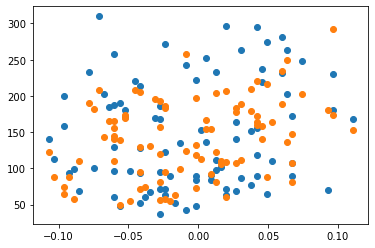

2890.7594577799755

In [8]:
def Test(x,y,model):
    prediction = model(x, W, b)
    mse = loss(x, W, b, y,model)
    plt.scatter(x[:,0], y)
    plt.scatter(x[:,0], prediction)
    plt.show()
    return mse
mse = Test(X_test,y_test,Linear_model)
mse

## 데이터 정류
아래와 같이 각 요소별 상관관계를 보면 target과 bmi의 관계가 가장 선형에 가까우며 sex의 경우 상관관계가 0에 가까운 것을 볼 수 있다.
따라서 test 시에는 bmi에 대해 plot을 하고 데이터에서 sex를 제외한다.

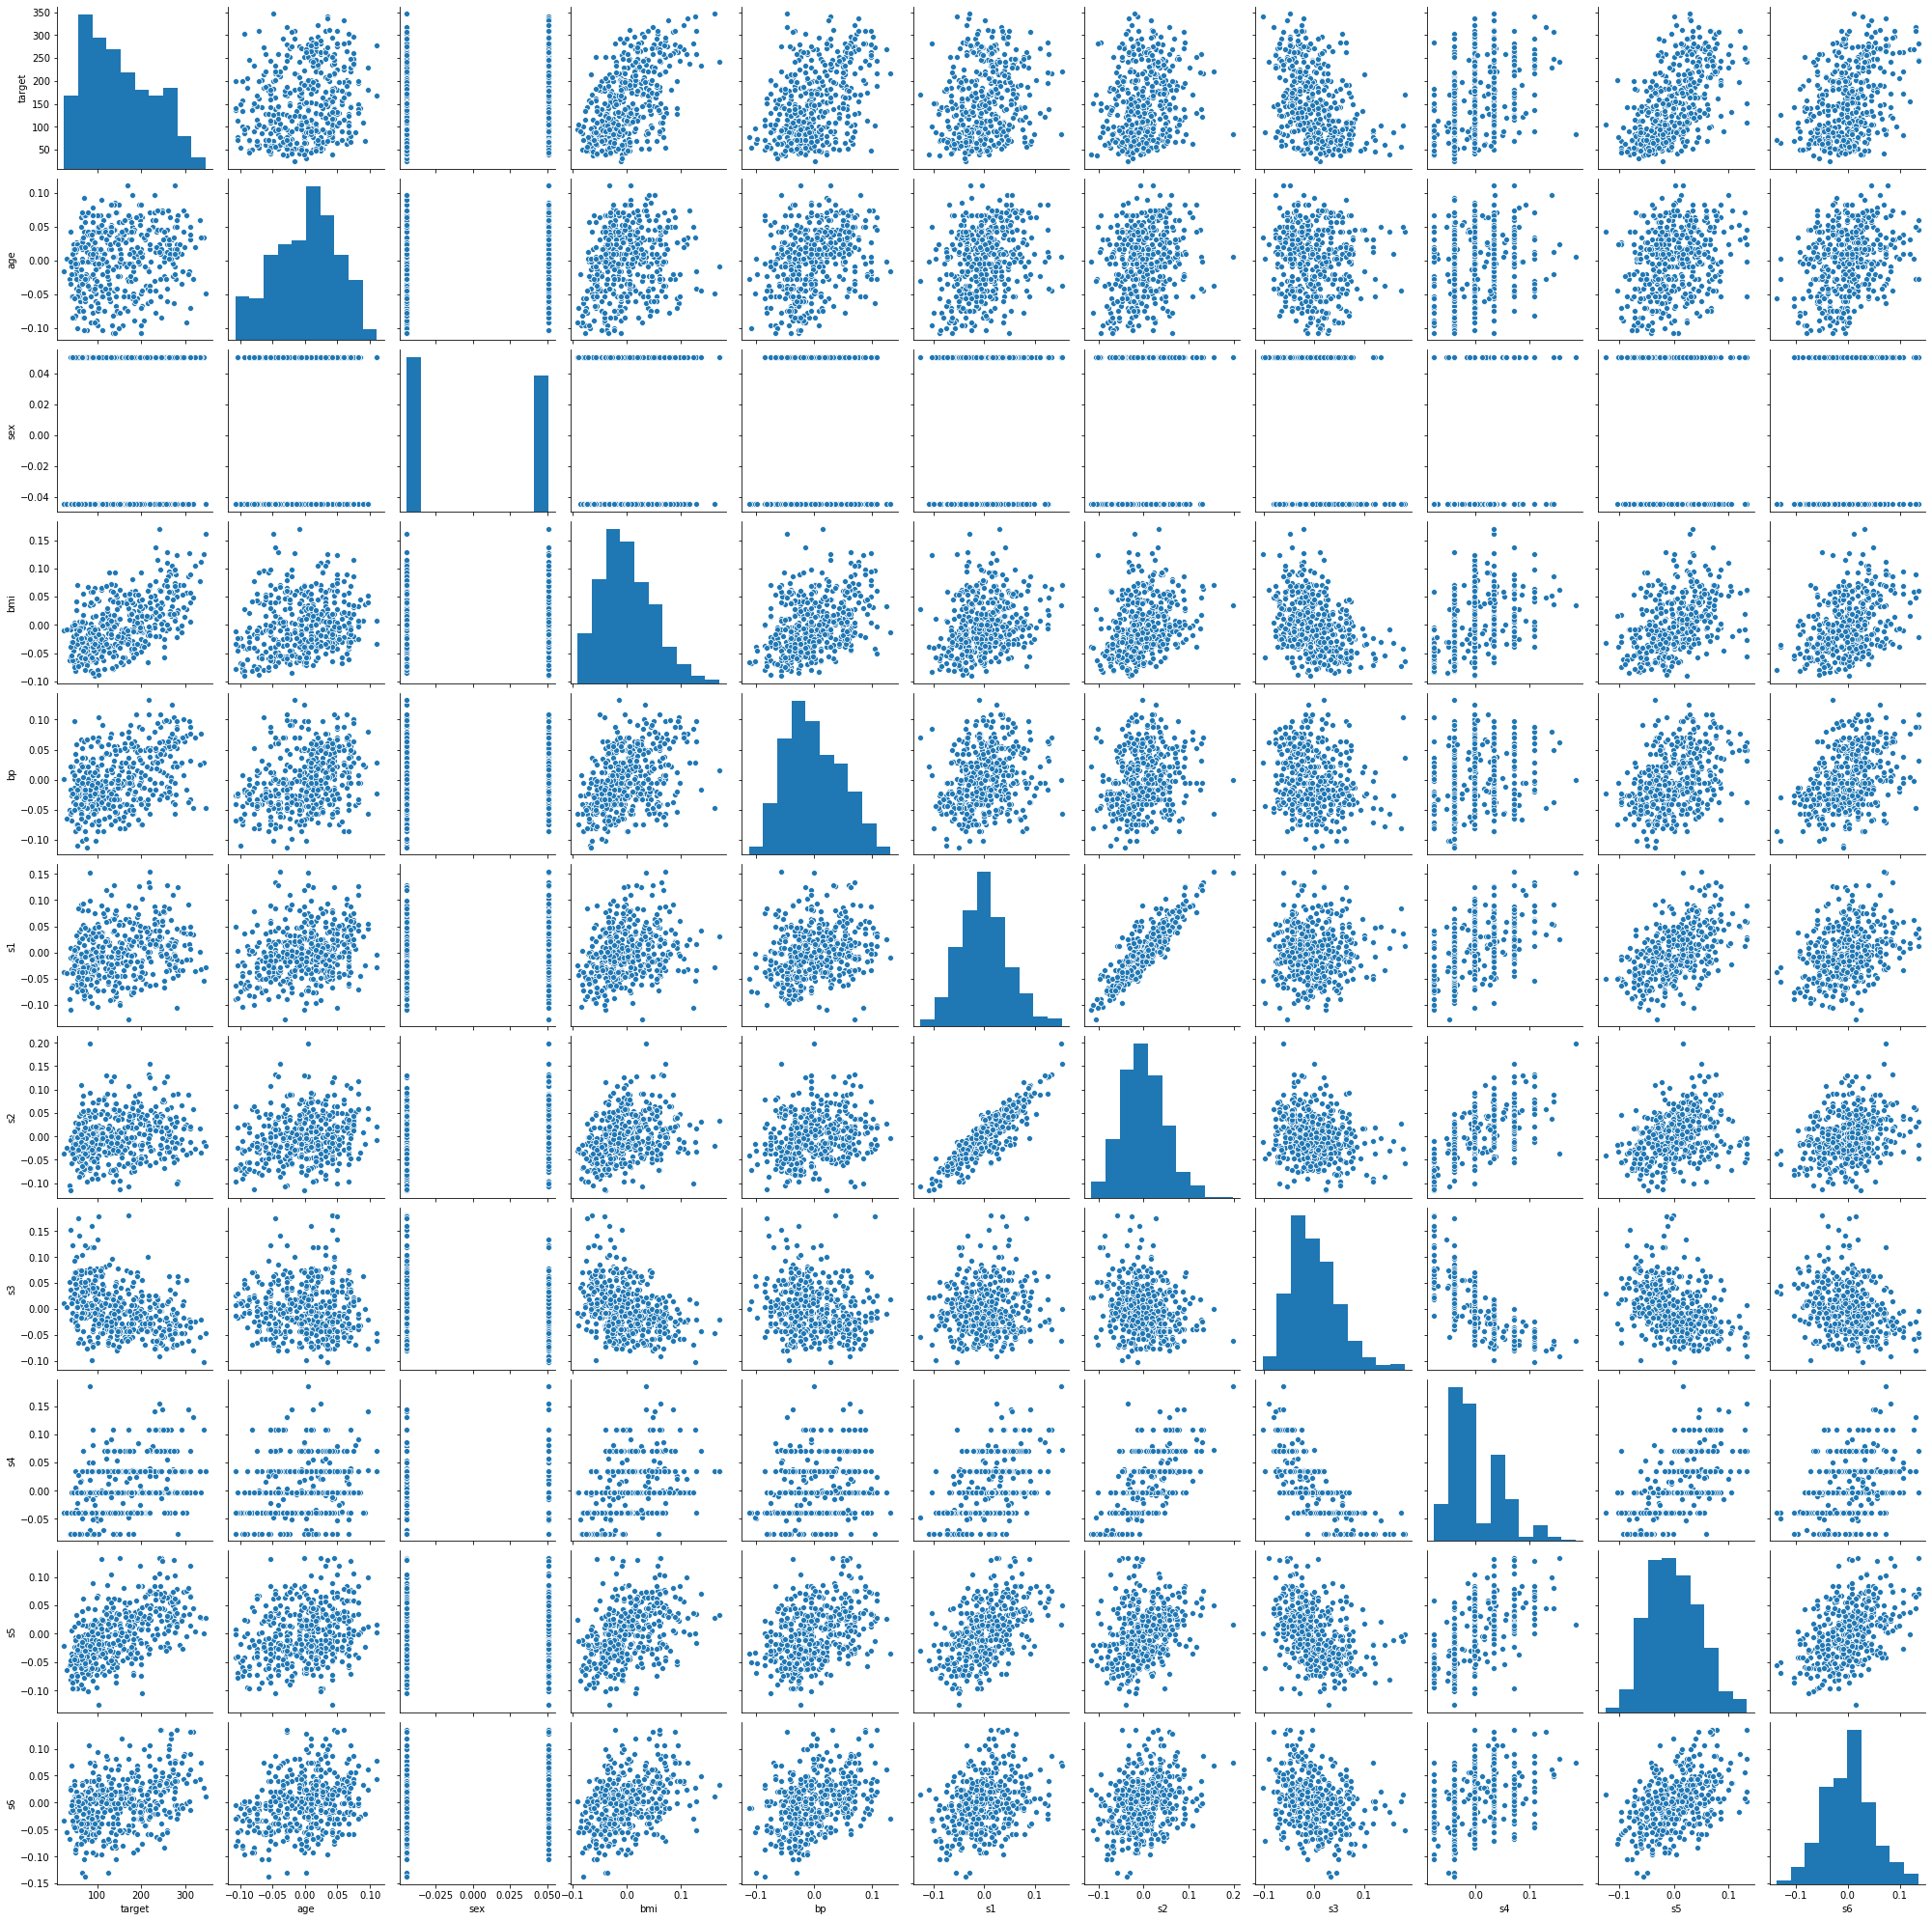

In [9]:
sns.pairplot(df[["target","age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"]])

In [10]:
for k in df_x.keys():
    print(k,np.corrcoef(df_x[k],df_y["target"])[0,1])

age 0.18788875071891975
sex 0.04306199845160541
bmi 0.5864501344746886
bp 0.44148384893088605
s1 0.2120224810145508
s2 0.17405358696874243
s3 -0.39478925067091825
s4 0.4304528847447732
s5 0.5658834252428097
s6 0.3824834842485811


In [11]:
df_x = df_x.drop(['sex'],axis=1)
for k in df_x.keys():
    df_x[k]/=max(abs(df_x[k]))

## 모델 학습 및 평가

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_x.values,df_y.values, test_size=0.2, random_state=42)

W= np.expand_dims(np.random.rand(len(X_train[0])),-1)
b=np.random.rand()
LEARNING_RATE= 0.5 #0.5:2973 0.25:2976

losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train,Linear_model)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train,Linear_model)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))



Iteration 100 : Loss 2995.0055
Iteration 200 : Loss 2992.0504
Iteration 300 : Loss 2989.5065
Iteration 400 : Loss 2987.3023
Iteration 500 : Loss 2985.3922
Iteration 600 : Loss 2983.7371
Iteration 700 : Loss 2982.3028
Iteration 800 : Loss 2981.0600
Iteration 900 : Loss 2979.9831
Iteration 1000 : Loss 2979.0498
Iteration 1100 : Loss 2978.2411
Iteration 1200 : Loss 2977.5404
Iteration 1300 : Loss 2976.9331
Iteration 1400 : Loss 2976.4069
Iteration 1500 : Loss 2975.9510
Iteration 1600 : Loss 2975.5559
Iteration 1700 : Loss 2975.2135
Iteration 1800 : Loss 2974.9168
Iteration 1900 : Loss 2974.6597
Iteration 2000 : Loss 2974.4369
Iteration 2100 : Loss 2974.2438
Iteration 2200 : Loss 2974.0765
Iteration 2300 : Loss 2973.9316
Iteration 2400 : Loss 2973.8060
Iteration 2500 : Loss 2973.6971
Iteration 2600 : Loss 2973.6028
Iteration 2700 : Loss 2973.5211
Iteration 2800 : Loss 2973.4502
Iteration 2900 : Loss 2973.3889
Iteration 3000 : Loss 2973.3357
Iteration 3100 : Loss 2973.2896
Iteration 3200 : 

Iteration 28900 : Loss 2972.9903
Iteration 29000 : Loss 2972.9903
Iteration 29100 : Loss 2972.9903
Iteration 29200 : Loss 2972.9903
Iteration 29300 : Loss 2972.9903
Iteration 29400 : Loss 2972.9903
Iteration 29500 : Loss 2972.9903
Iteration 29600 : Loss 2972.9903
Iteration 29700 : Loss 2972.9903
Iteration 29800 : Loss 2972.9903
Iteration 29900 : Loss 2972.9903
Iteration 30000 : Loss 2972.9903
Iteration 30100 : Loss 2972.9903
Iteration 30200 : Loss 2972.9903
Iteration 30300 : Loss 2972.9903
Iteration 30400 : Loss 2972.9903
Iteration 30500 : Loss 2972.9903
Iteration 30600 : Loss 2972.9903
Iteration 30700 : Loss 2972.9903
Iteration 30800 : Loss 2972.9903
Iteration 30900 : Loss 2972.9903
Iteration 31000 : Loss 2972.9903
Iteration 31100 : Loss 2972.9903
Iteration 31200 : Loss 2972.9903
Iteration 31300 : Loss 2972.9903
Iteration 31400 : Loss 2972.9903
Iteration 31500 : Loss 2972.9903
Iteration 31600 : Loss 2972.9903
Iteration 31700 : Loss 2972.9903
Iteration 31800 : Loss 2972.9903
Iteration 

Iteration 58800 : Loss 2972.9903
Iteration 58900 : Loss 2972.9903
Iteration 59000 : Loss 2972.9903
Iteration 59100 : Loss 2972.9903
Iteration 59200 : Loss 2972.9903
Iteration 59300 : Loss 2972.9903
Iteration 59400 : Loss 2972.9903
Iteration 59500 : Loss 2972.9903
Iteration 59600 : Loss 2972.9903
Iteration 59700 : Loss 2972.9903
Iteration 59800 : Loss 2972.9903
Iteration 59900 : Loss 2972.9903
Iteration 60000 : Loss 2972.9903
Iteration 60100 : Loss 2972.9903
Iteration 60200 : Loss 2972.9903
Iteration 60300 : Loss 2972.9903
Iteration 60400 : Loss 2972.9903
Iteration 60500 : Loss 2972.9903
Iteration 60600 : Loss 2972.9903
Iteration 60700 : Loss 2972.9903
Iteration 60800 : Loss 2972.9903
Iteration 60900 : Loss 2972.9903
Iteration 61000 : Loss 2972.9903
Iteration 61100 : Loss 2972.9903
Iteration 61200 : Loss 2972.9903
Iteration 61300 : Loss 2972.9903
Iteration 61400 : Loss 2972.9903
Iteration 61500 : Loss 2972.9903
Iteration 61600 : Loss 2972.9903
Iteration 61700 : Loss 2972.9903
Iteration 

Iteration 88400 : Loss 2972.9903
Iteration 88500 : Loss 2972.9903
Iteration 88600 : Loss 2972.9903
Iteration 88700 : Loss 2972.9903
Iteration 88800 : Loss 2972.9903
Iteration 88900 : Loss 2972.9903
Iteration 89000 : Loss 2972.9903
Iteration 89100 : Loss 2972.9903
Iteration 89200 : Loss 2972.9903
Iteration 89300 : Loss 2972.9903
Iteration 89400 : Loss 2972.9903
Iteration 89500 : Loss 2972.9903
Iteration 89600 : Loss 2972.9903
Iteration 89700 : Loss 2972.9903
Iteration 89800 : Loss 2972.9903
Iteration 89900 : Loss 2972.9903
Iteration 90000 : Loss 2972.9903
Iteration 90100 : Loss 2972.9903
Iteration 90200 : Loss 2972.9903
Iteration 90300 : Loss 2972.9903
Iteration 90400 : Loss 2972.9903
Iteration 90500 : Loss 2972.9903
Iteration 90600 : Loss 2972.9903
Iteration 90700 : Loss 2972.9903
Iteration 90800 : Loss 2972.9903
Iteration 90900 : Loss 2972.9903
Iteration 91000 : Loss 2972.9903
Iteration 91100 : Loss 2972.9903
Iteration 91200 : Loss 2972.9903
Iteration 91300 : Loss 2972.9903
Iteration 

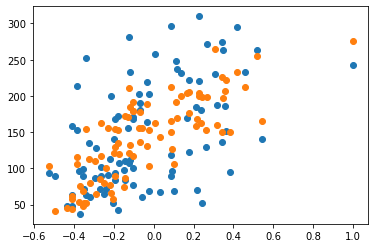

2986.721225331255

In [13]:
def Test(x,y,model):
    prediction = model(x, W, b)
    mse = loss(x, W, b, y,model)
    plt.scatter(x[:,1], y)
    plt.scatter(x[:,1], prediction)
    plt.show()
    return mse
mse=Test(X_test,y_test,Linear_model)
mse

상관계수가 낮아 방해가 될줄 알고 train에서 제외 하였지만, 오히려 정확도가 더 떨어졌다.

# 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('./train.csv',parse_dates=True)
df['date'] = pd.to_datetime(df['datetime'])

df['year'], df['month'],df['day'],df['hour'],df['minute'],df['second'] = df['date'].dt.year, df['date'].dt.month , df['date'].dt.day, df['date'].dt.hour, df['date'].dt.minute, df['date'].dt.second
df=df.drop(['datetime','date'],axis=1)

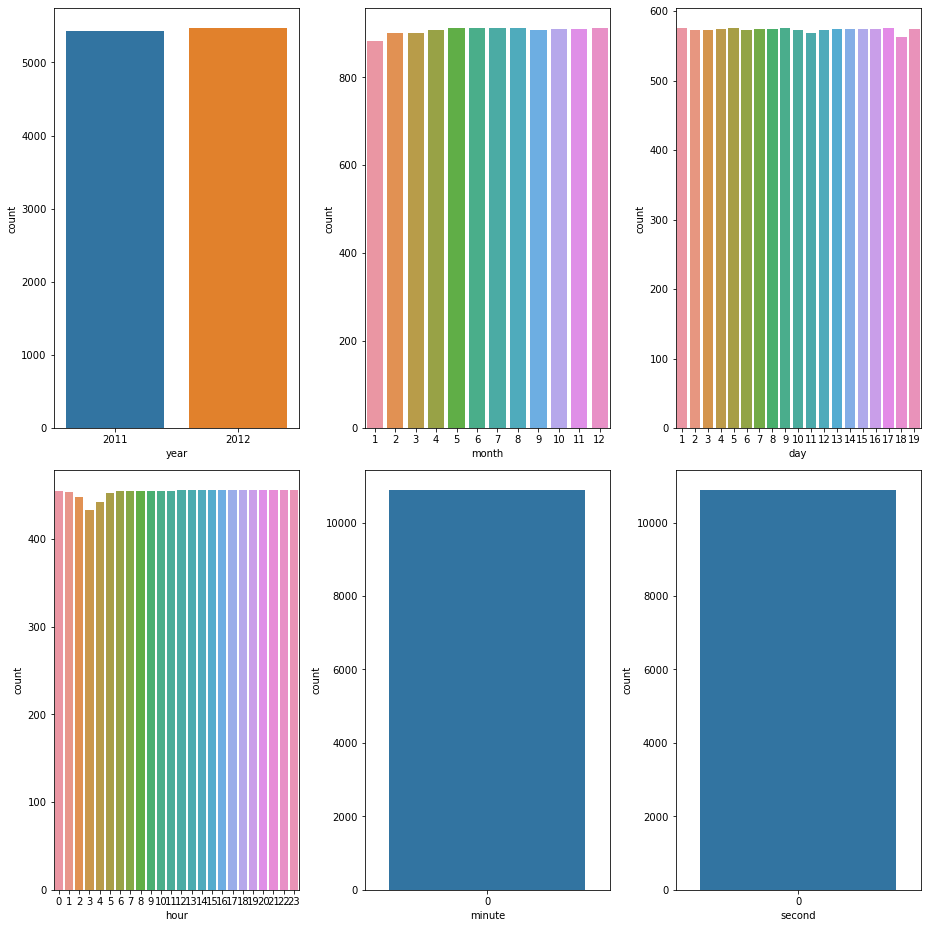

In [15]:
fig = plt.figure(figsize=(13,13))
plt.subplot(231)
sns.countplot(x="year", data=df)
plt.subplot(232)
sns.countplot(x="month", data=df)
plt.subplot(233)
sns.countplot(x="day", data=df)
plt.subplot(234)
sns.countplot(x="hour", data=df)
plt.subplot(235)
sns.countplot(x="minute", data=df)
plt.subplot(236)
sns.countplot(x="second", data=df)
fig.tight_layout()
plt.show()

## 데이터 제거 및 분류

In [16]:
df = df.drop(['minute','second'],axis=1)

In [17]:
df_y = df['count']
df_x = df.drop(['count'],axis=1)

In [18]:
df_y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [19]:
df_x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012,12,19,22


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_x.values,df_y.values, test_size=0.2, random_state=42)


## 모델 학습

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 모델 평가

In [22]:
def MSE(a, b):
    return ((a - b) ** 2).mean()
def RMSE(a,b):
    return np.sqrt(MSE(a,b))

predictions = model.predict(X_test)
print("MSE =",MSE(y_test,predictions))
print("RMSE =",RMSE(y_test,predictions))

MSE = 2.6971886988678824e-25
RMSE = 5.193446542391558e-13


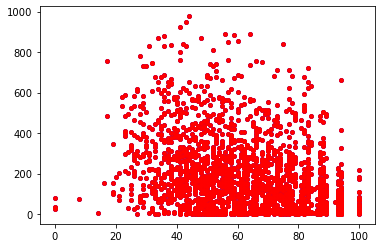

In [23]:
plt.scatter(X_test[:,6], y_test,color='b',s=15) # plot by humidity
plt.scatter(X_test[:,6], predictions,color='r',s=15)
plt.show()

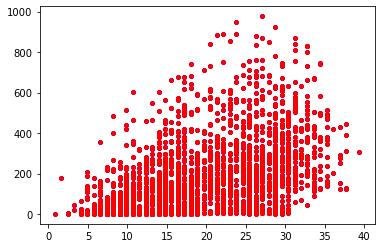

In [24]:
 # plot by temp
plt.scatter(X_test[:,4], y_test,color='b',s=15) #plot by temp
plt.scatter(X_test[:,4], predictions,color='r',s=15)
plt.show()